# **Perceptrón**

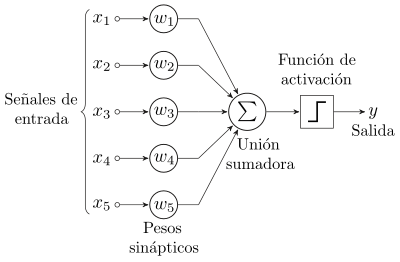

La fórmula es la siguiente:
**1/(1+e^x)**

In [76]:
import numpy as np
from matplotlib import pyplot as plt

In [77]:
# TENDRÍAMOS LA FORMULA ANTERIOR
def sigmoide(z):
    return 1/(1+np.exp(-z))

# SU DERIVADA ES
def sigmoide_derizada_respecto_z(z):
    return sigmoide(z)*(1-sigmoide(z))

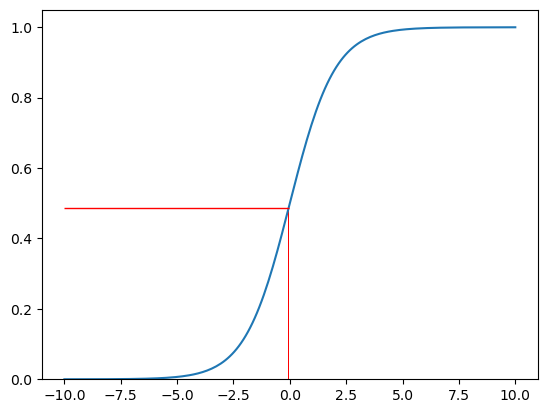

In [78]:
xs = np.linspace(10,-10,200)
ys = sigmoide(xs)
plt.plot(xs,ys)
plt.bar(xs[int(xs.__len__()/2)],ys[int(ys.__len__()/2)],0.05,color="r")
plt.hlines(ys[int(ys.__len__()/2)], xmin=xs.min(), xmax=xs[int(xs.__len__()/2)], linewidth=1,color="r")

In [79]:
# AÑADIMOS UN DATASET

# X1    X2  |  Y
# 0     0   |  0
# 0     1   |  1
# 1     0   |  1
# 1     1   |  1

# ESTA SERÍA LA OPERACIÓN
# 0*2 + 0*3 + 4     =   4
# 0*2 + 1*3 + 4     =   7
# 1*2 + 0*3 + 4     =   6
# 1*2 + 1*3 + 4     =   9

dt = [[0,0,0],[0,1,1],[1,0,1],[1,1,1]]
dt = np.array(dt)

#PRIMERAS 2 COLUMNAS
x = dt[:,[0,1]]

#ÚLTIMA COLUMNA
y = dt[:,[2]]
print(x)
print(y)


[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [1]]


In [80]:
w1=2; w2=3; b=4

In [81]:
#region SALIDAS
def salida_sumatorio(x):
    #PRIMERA COLUMNA
    x1 = x[:,[0]]
    #SEGUNDA COLUMNA
    x2 = x[:,[1]]
    
    # EN ESTE CASO W SON NÚMEROS PERO PUEDEN SER MATRICES
    x1 = x1 * w1
    x2 = x2 * w2
    return x1 + x2 + b

def salida_activación(x):
    # OBTENEMOS LA OPERACIÓN DEL SUMATORIO
    s = salida_sumatorio(x)
    
    #CON ESO VAMOS AL SIGNMOIDE
    s2 = sigmoide(s)
    return s2

#endregion

#region ERROR Y COSTE
# X E Y REALES
def error(x,y):
    """
    x: param: X REALES
    y: param: Y REALES
    """
    y_hat = salida_activación(x)
    return y_hat - y

def coste(x,y):
    """
    ES EL ERROR/MEDIA Y DIVIDIDO ENTRE 2
    x: param: X REALES
    y: param: Y REALES
    """
    err = error(x,y)
    c = (err**2/2).mean()
    return c
#endregion

#region DERIVADAS
"""
DERIVADAS
"""

def derivada_coste_respecto_y_hat(x,y):
    """
    LA DERIVADA DEL COSTE RESPECTO Y_HAT ES LA MEDIA DEL ERROR
    x: param: X REALES
    y: param: Y REALES
    """
    return error(x,y).mean()

def derivada_y_hat_respecto_sumatorio_z(x):
    """
    LA DERIVADA DE Y_HAT RESPECTO AL SUMATORIO/Z
    x: param: X REALES
    """
    z = salida_sumatorio(x)
    return sigmoide_derizada_respecto_z(z)

def derivada_sumatorio_respecto_w1(x):
    """
    LA DERIVADA DE SUMATORIO/Z RESPECTO A W1
    
    SE DEBE HACER MEDIAS YA QUE PUEDE SER UN ARRAY NO SOLO UN VALOR
    
    x: param: X REALES
    """
    return x[:,[0]].mean()

def derivada_sumatorio_respecto_w2(x):
  return x[:, [1]]

def derivada_sumatorio_respecto_bias():
  return 1
#endregion

def predice(x):
  y_hat = salida_activación(x)
  return y_hat

In [82]:
# NOS DÁ LOS VALORES DEL PRINCIPIO

# X1    X2  |  Y
# 0     0   |  0
# 0     1   |  1
# 1     0   |  1
# 1     1   |  1

# ESTA SERÍA LA OPERACIÓN
# 0*2 + 0*3 + 4     =   4
# 0*2 + 1*3 + 4     =   7
# 1*2 + 0*3 + 4     =   6
# 1*2 + 1*3 + 4     =   9


salida_sumatorio(x)

array([[4],
       [7],
       [6],
       [9]])

In [83]:
xpru = x
s = salida_activación(xpru)
print(s)

# AÚN NOS FALTA EL ERROR Y EL COSTE, VAMOS AÑADIRLO
s = error(xpru,y)
print(f"\nERROR: {s}")


# AÚN NOS FALTA EL ERROR Y EL COSTE, VAMOS AÑADIRLO
s = coste(xpru,y)
print(f"\nCOSTE: {s}")

[[0.98201379]
 [0.99908895]
 [0.99752738]
 [0.99987661]]

ERROR: [[ 9.82013790e-01]
 [-9.11051194e-04]
 [-2.47262316e-03]
 [-1.23394576e-04]]

COSTE: 0.12054475536629904


In [84]:
# dCoste/dW1 = dCoste/dY * dY/dz * dz/dW1

# SUS DERIVADAS SE HARÁN EN LA REGION DE DERIVADAS


In [93]:
def fit(x,y,epochs=100,lr=0.01):
    """
    REGIÓN DE ENTRENAMIENTO CON LOS DATOS QUE TENEMOS
    x: param List<int>: NÚMEROS REALES DE X
    y: param List<int>: NÚMEROS REALES DE Y
    epochs: param int: NÚMERO DE REPETICIONES
    lr: param float: LEARNING RATE
    """
    global w1, w2, b
    ilos = []
    for epoch in range(epochs):
        
        #GRADIENTES DE CADA PUNTO
        dc = derivada_coste_respecto_y_hat(x,y)
        dy = derivada_y_hat_respecto_sumatorio_z(x)
        dw1 = derivada_sumatorio_respecto_w1(x)
        dw2 = derivada_sumatorio_respecto_w2(x)
        db = derivada_sumatorio_respecto_bias()
        
        #AL NO HACER LA MEDIA POR EL CAMINO HAY QUE HACERLA
        w1 = w1 - lr*dc*dy*dw1.mean()
        w2 = w2 - lr*dc*dy*dw2.mean()
        b = b - lr*dc*dy*db
        
        # GUARDAMOS LA PERDIDA
        ilos.append(coste(x,y))
        print(f"LOSS: {coste(x,y)}")
    return ilos
        

LOSS: 0.12492190400043583
LOSS: 0.12484393919620557
LOSS: 0.1247661054597681
LOSS: 0.12468840266308548
LOSS: 0.12461083067762695
LOSS: 0.12453338937437272
LOSS: 0.12445607862381802
LOSS: 0.12437889829597704
LOSS: 0.12430184826038665
LOSS: 0.12422492838611064
LOSS: 0.12414813854174328
LOSS: 0.12407147859541333
LOSS: 0.12399494841478798
LOSS: 0.12391854786707655
LOSS: 0.12384227681903458
LOSS: 0.12376613513696727
LOSS: 0.1236901226867338
LOSS: 0.12361423933375074
LOSS: 0.12353848494299596
LOSS: 0.12346285937901266
LOSS: 0.12338736250591278
LOSS: 0.12331199418738101
LOSS: 0.12323675428667852
LOSS: 0.1231616426666466
LOSS: 0.1230866591897106
LOSS: 0.12301180371788337
LOSS: 0.12293707611276924
LOSS: 0.12286247623556752
LOSS: 0.12278800394707641
LOSS: 0.12271365910769642
LOSS: 0.12263944157743428
LOSS: 0.12256535121590638
LOSS: 0.12249138788234265
LOSS: 0.12241755143558991
LOSS: 0.12234384173411575
LOSS: 0.12227025863601193
LOSS: 0.12219680199899825
LOSS: 0.12212347168042578
LOSS: 0.12205026

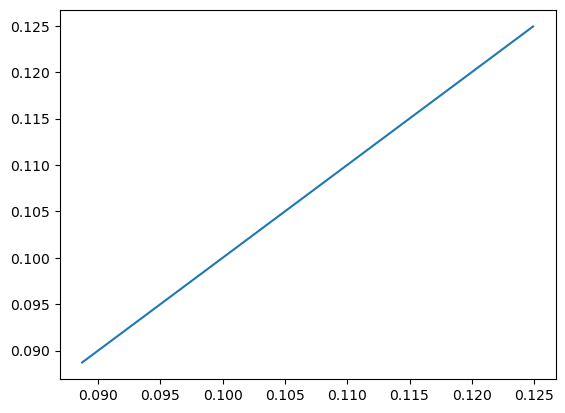

In [96]:
w1 = 0
w2 = 0
b = 0
ilos = fit(x,y,epochs=1000)

ret = predice(x)
print(ret)
#plt.plot([i for i in ilos],ilos)